In [23]:
import pandas as pd
import os

import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-kazantseva-40/shared/homeworks/python_ds_miniprojects/4/data'

In [3]:
df = []
folder_data = os.listdir(path)

for i in folder_data:
    path_to_folder_date = path + '/' + i
    folders_user = os.listdir(path_to_folder_date)
    
    for i in folders_user:
        path_to_folder_user = path_to_folder_date + '/' + i
        name_file = os.listdir(path_to_folder_user)
        path_to_file = path_to_folder_user + '/' + name_file[0]
        df.append(path_to_file)
        
list = df
base = pd.DataFrame()
for stroka in list:
    test = []
    p = stroka
    for row in open(p).readlines():
        if 'product_id' in row:
            col_name = row
            continue
        test.append([value.strip() for value in row.split(',')])
        final_col_names = [col.strip() for col in col_name.split(',')]

    test = pd.DataFrame(test, columns=final_col_names).drop(columns='')
    test['name'] = str(p).split('/')[-2]
    test['date'] = str(p).split('/')[-3]
    base = test.append(base)

base = base.reset_index(drop=True)
base

,product_id,quantity,name,date
0,95,2,Vasiliy_Ivanov,2020-12-07
1,83,3,Vasiliy_Ivanov,2020-12-07
2,64,1,Vasiliy_Ivanov,2020-12-07
3,18,4,Petr_Fedorov,2020-12-07
4,94,4,Petr_Fedorov,2020-12-07
...,...,...,...,...
156,27,4,Petr_Ivanov,2020-12-05
157,89,1,Petr_Ivanov,2020-12-05
158,33,2,Petr_Ivanov,2020-12-05
159,8,3,Petr_Ivanov,2020-12-05


In [4]:
base.dtypes

product_id    object
quantity      object
name          object
date          object
dtype: object

In [5]:
base['date'] = pd.to_datetime(base['date'], dayfirst=True)

In [6]:
base.product_id = base.product_id.astype('int')

In [7]:
base.quantity = base.quantity.astype('int')

In [8]:
base.dtypes

product_id             int64
quantity               int64
name                  object
date          datetime64[ns]
dtype: object

In [9]:
base.quantity.sum()

480

In [20]:
best_user = base \
        .groupby(['name'], as_index=True) \
        .aggregate({'quantity': 'sum'}) \
        .sort_values(['quantity'], ascending=False)
best_user.head(3)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45


In [32]:
best_product = base \
        .groupby(['product_id'], as_index=False) \
        .aggregate({'quantity': 'sum'}) \
        .sort_values(['quantity'], ascending=False)
best_product.head(10)

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


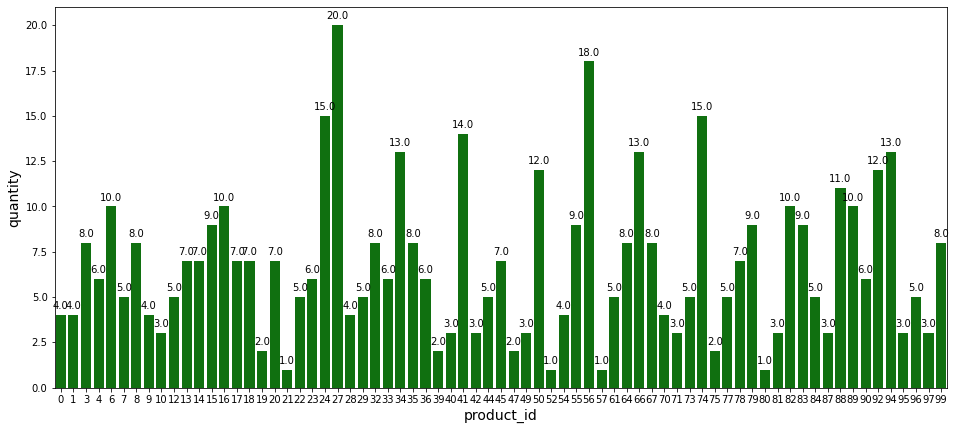

In [45]:
plt.figure(figsize = (16, 7))
splot = sns.barplot (x="product_id", y="quantity", data=best_product, color = 'green')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("product_id", size = 14)
plt.ylabel("quantity", size = 14)
plt.show()

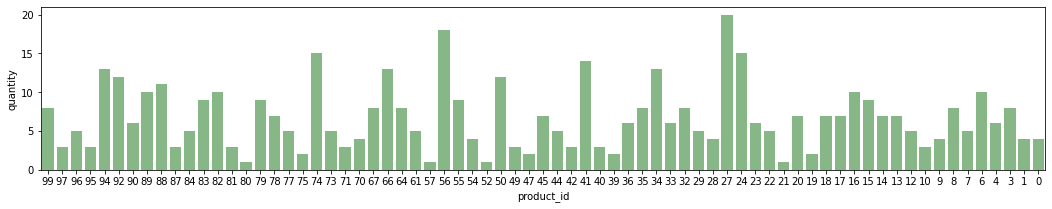

In [58]:
plt.figure(figsize = (18, 3))
splot = sns.barplot (x="product_id", 
                     y="quantity", 
                     data=best_product, 
                     color = 'green', 
                     alpha = 0.5, 
                     order = best_product.product_id.sort_values(ascending = False))

In [62]:
date_product = base \
        .groupby(['date'], as_index=False) \
        .aggregate({'quantity': 'sum'}) \
        
date_product.head(10)

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


Text(0, 0.5, 'quantity')

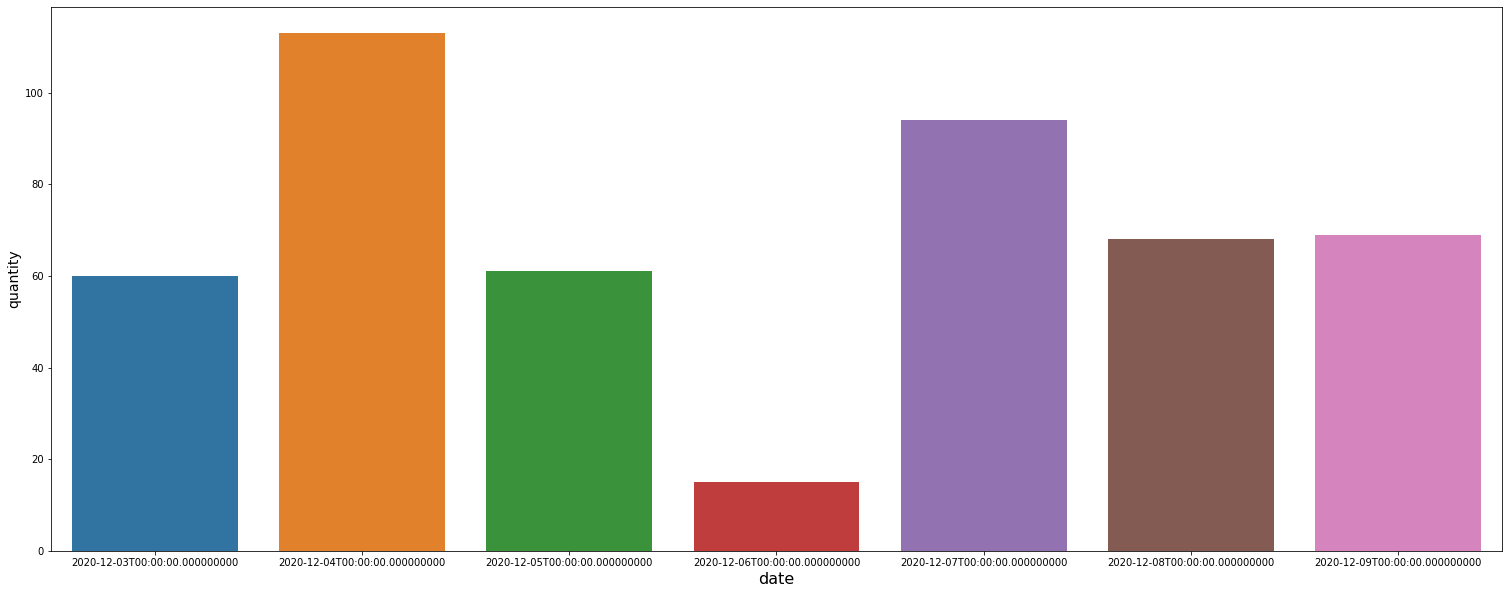

In [66]:
plt.figure(figsize = (26, 10))
sns.barplot (x="date", y="quantity", data=date_product)
plt.xlabel("date", size = 16)
plt.ylabel("quantity", size = 14)

In [77]:
dubl_prod = base.drop_duplicates(subset=['name', 'product_id', 'date'])
dubl_prod = dubl_prod \
        .groupby(['name', 'product_id'], as_index=False) \
        .aggregate({'date': 'count'}) \
        .query('date > 1')
dubl_prod

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


In [10]:
'''
test = []
for i in open(str(list[0])).readlines():
    if 'product_id' in i:
            col_name = i
            continue
    test.append([value.strip() for value in i.split(',')])
    final_col_names = [col.strip() for col in col_name.split(',')]

test = pd.DataFrame(test, columns=final_col_names).drop(columns='')
test['name'] = str(list[0]).split('/')[-2]
test['date'] = str(list[0]).split('/')[-3]
base = test.append(base)
base
'''

"\ntest = []\nfor i in open(str(list[0])).readlines():\n    if 'product_id' in i:\n            col_name = i\n            continue\n    test.append([value.strip() for value in i.split(',')])\n    final_col_names = [col.strip() for col in col_name.split(',')]\n\ntest = pd.DataFrame(test, columns=final_col_names).drop(columns='')\ntest['name'] = str(list[0]).split('/')[-2]\ntest['date'] = str(list[0]).split('/')[-3]\nbase = test.append(base)\nbase\n"

In [11]:
'''
for stroka in list:
    test = []
    p = stroka
    for row in open(p).readlines():
        if 'product_id' in row:
            col_name = row
            continue
        test.append([value.strip() for value in row.split(',')])
        final_col_names = [col.strip() for col in col_name.split(',')]

test = pd.DataFrame(test, columns=final_col_names).drop(columns='')
test['name'] = str(p).split('/')[-2]
test['date'] = str(p).split('/')[-3]
base = test.append(base)
base
'''

"\nfor stroka in list:\n    test = []\n    p = stroka\n    for row in open(p).readlines():\n        if 'product_id' in row:\n            col_name = row\n            continue\n        test.append([value.strip() for value in row.split(',')])\n        final_col_names = [col.strip() for col in col_name.split(',')]\n\ntest = pd.DataFrame(test, columns=final_col_names).drop(columns='')\ntest['name'] = str(p).split('/')[-2]\ntest['date'] = str(p).split('/')[-3]\nbase = test.append(base)\nbase\n"

In [12]:
# for path, dirs, files in os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-kazantseva-40/shared/homeworks/python_ds_miniprojects/4/data/'):
#    print(path, dirs, files)

In [13]:
# folder_data = os.listdir(path)
# folder_data

In [14]:
'''
for i in folder_data:
    path_to_folder_date = path + '/' + i
    folders_user = os.listdir(path_to_folder_date)
    print (folders_user)
'''

"\nfor i in folder_data:\n    path_to_folder_date = path + '/' + i\n    folders_user = os.listdir(path_to_folder_date)\n    print (folders_user)\n"

In [15]:
'''
for user in folders_user:
    path_to_folder_user = path_to_folder_date + '/' + user
    name_file = os.listdir(path_to_folder_user)
    print (name_file)
'''

"\nfor user in folders_user:\n    path_to_folder_user = path_to_folder_date + '/' + user\n    name_file = os.listdir(path_to_folder_user)\n    print (name_file)\n"

In [16]:
'''
for i in open(str(list[0])).readlines():
    if 'product_id' in i:
            col_name = i
            continue
    print(i)
'''    

"\nfor i in open(str(list[0])).readlines():\n    if 'product_id' in i:\n            col_name = i\n            continue\n    print(i)\n"

In [17]:
#col_name

In [18]:
'''
final_col_names = [col.strip() for col in col_name.split(',')]
final_col_names
'''

"\nfinal_col_names = [col.strip() for col in col_name.split(',')]\nfinal_col_names\n"